# 1.0 Import Dependencies

In [2]:
from ultralytics import YOLO
import os
from PIL import Image

In [14]:
model=YOLO('./runs/detect/train4/weights/best.pt')

# 2.0 Model Training

In [17]:
results = model.train(data="./data.yaml", 
                     epochs=15, 
                     imgsz=640, 
                     workers=os.cpu_count(), 
                     batch=8, 
                     patience=5, 
                     device='mps', 
                     seed=42, 
                     optimizer='Adam', 
                     dropout=0.5,
                     degrees=45.0,
                     translate=0.4,
                     flipud=0.5,
                     shear=20.0,
                     fliplr=0.5,
                     hsv_h=0.3,
                     hsv_v=0.5,
                     perspective=0.0005,
                     copy_paste=0.5,
                     copy_paste_mode='flip')


Ultralytics 8.3.208 🚀 Python-3.11.13 torch-2.8.0 MPS (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=45.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.5, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.3, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=./runs/detect/train4/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=5, perspective=0.0005, plots=True, pose=12.0, p

## 2.2 Validation

In [ ]:
results.val(
    imgsz=640,
    batch=8,
    device='mps',
    plots=True,
    verbose=True,
    workers=os.cpu_count(),
)

# 3.0 Evaluation

In [ ]:
!yolo predict model=./runs/segment/train8/weights/best.pt source=./test/images

## 3.1 Confusion Matrix

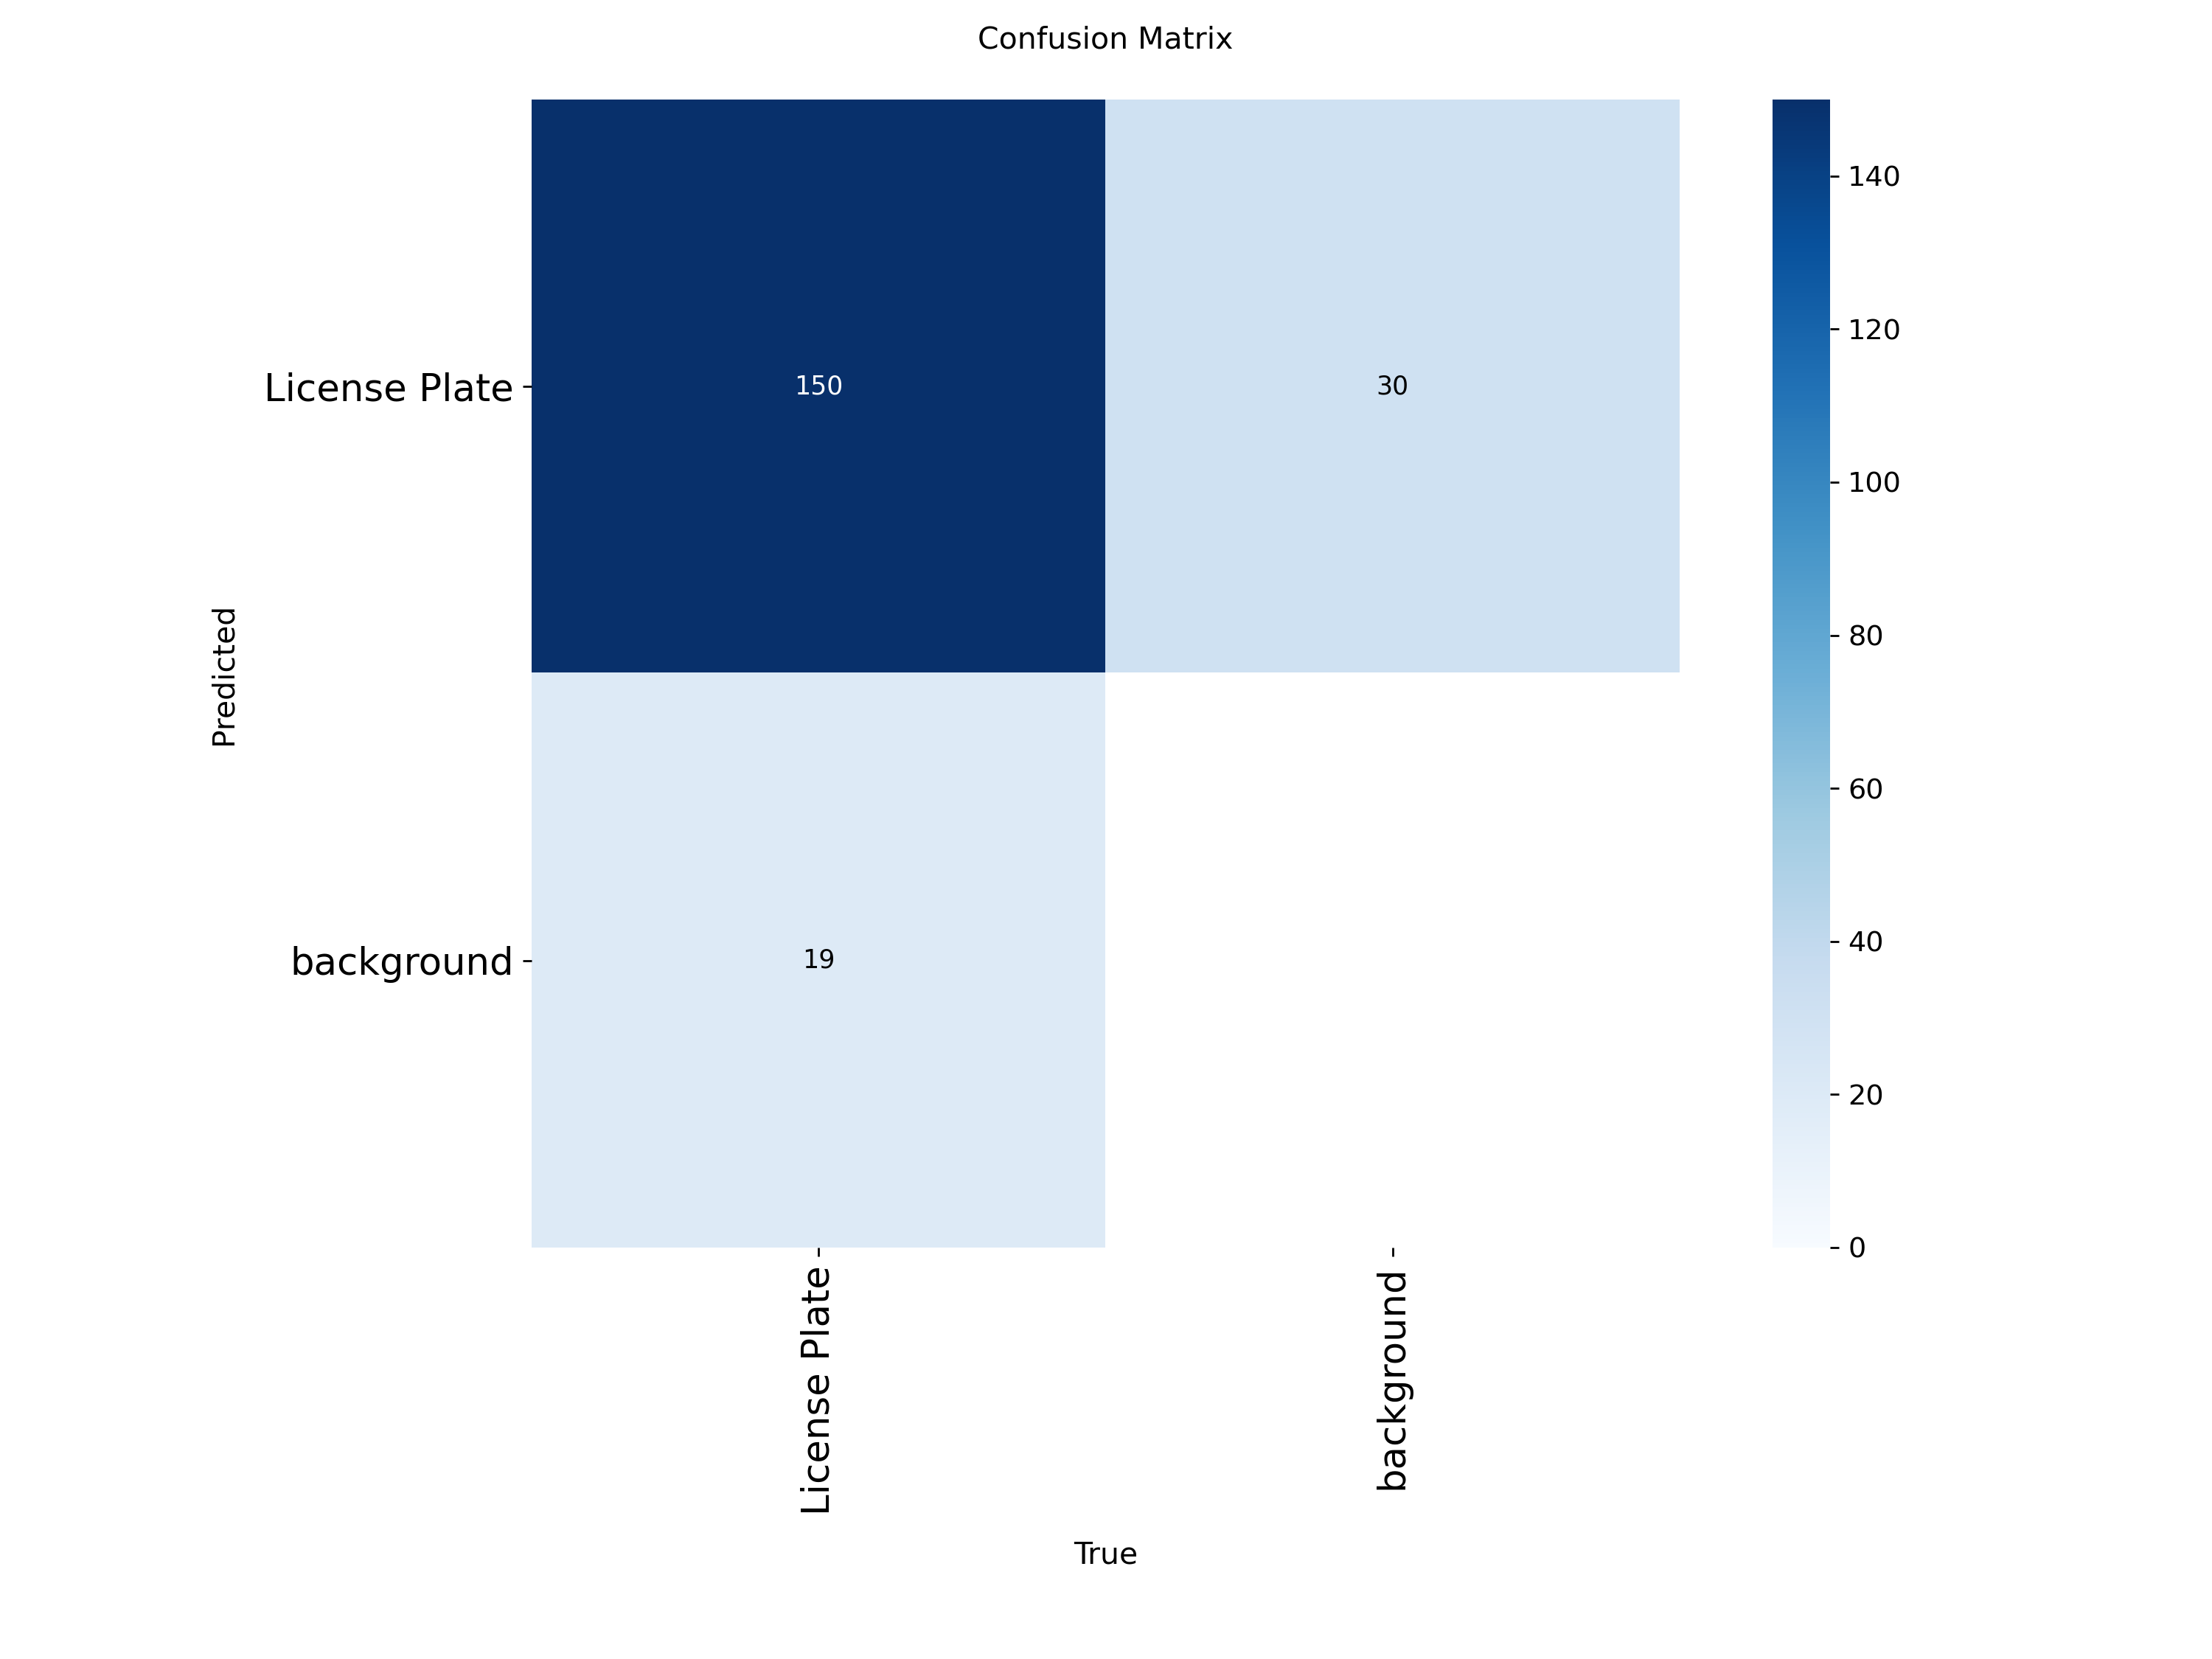

In [6]:
Image.open('./runs/detect/train10/confusion_matrix.png')

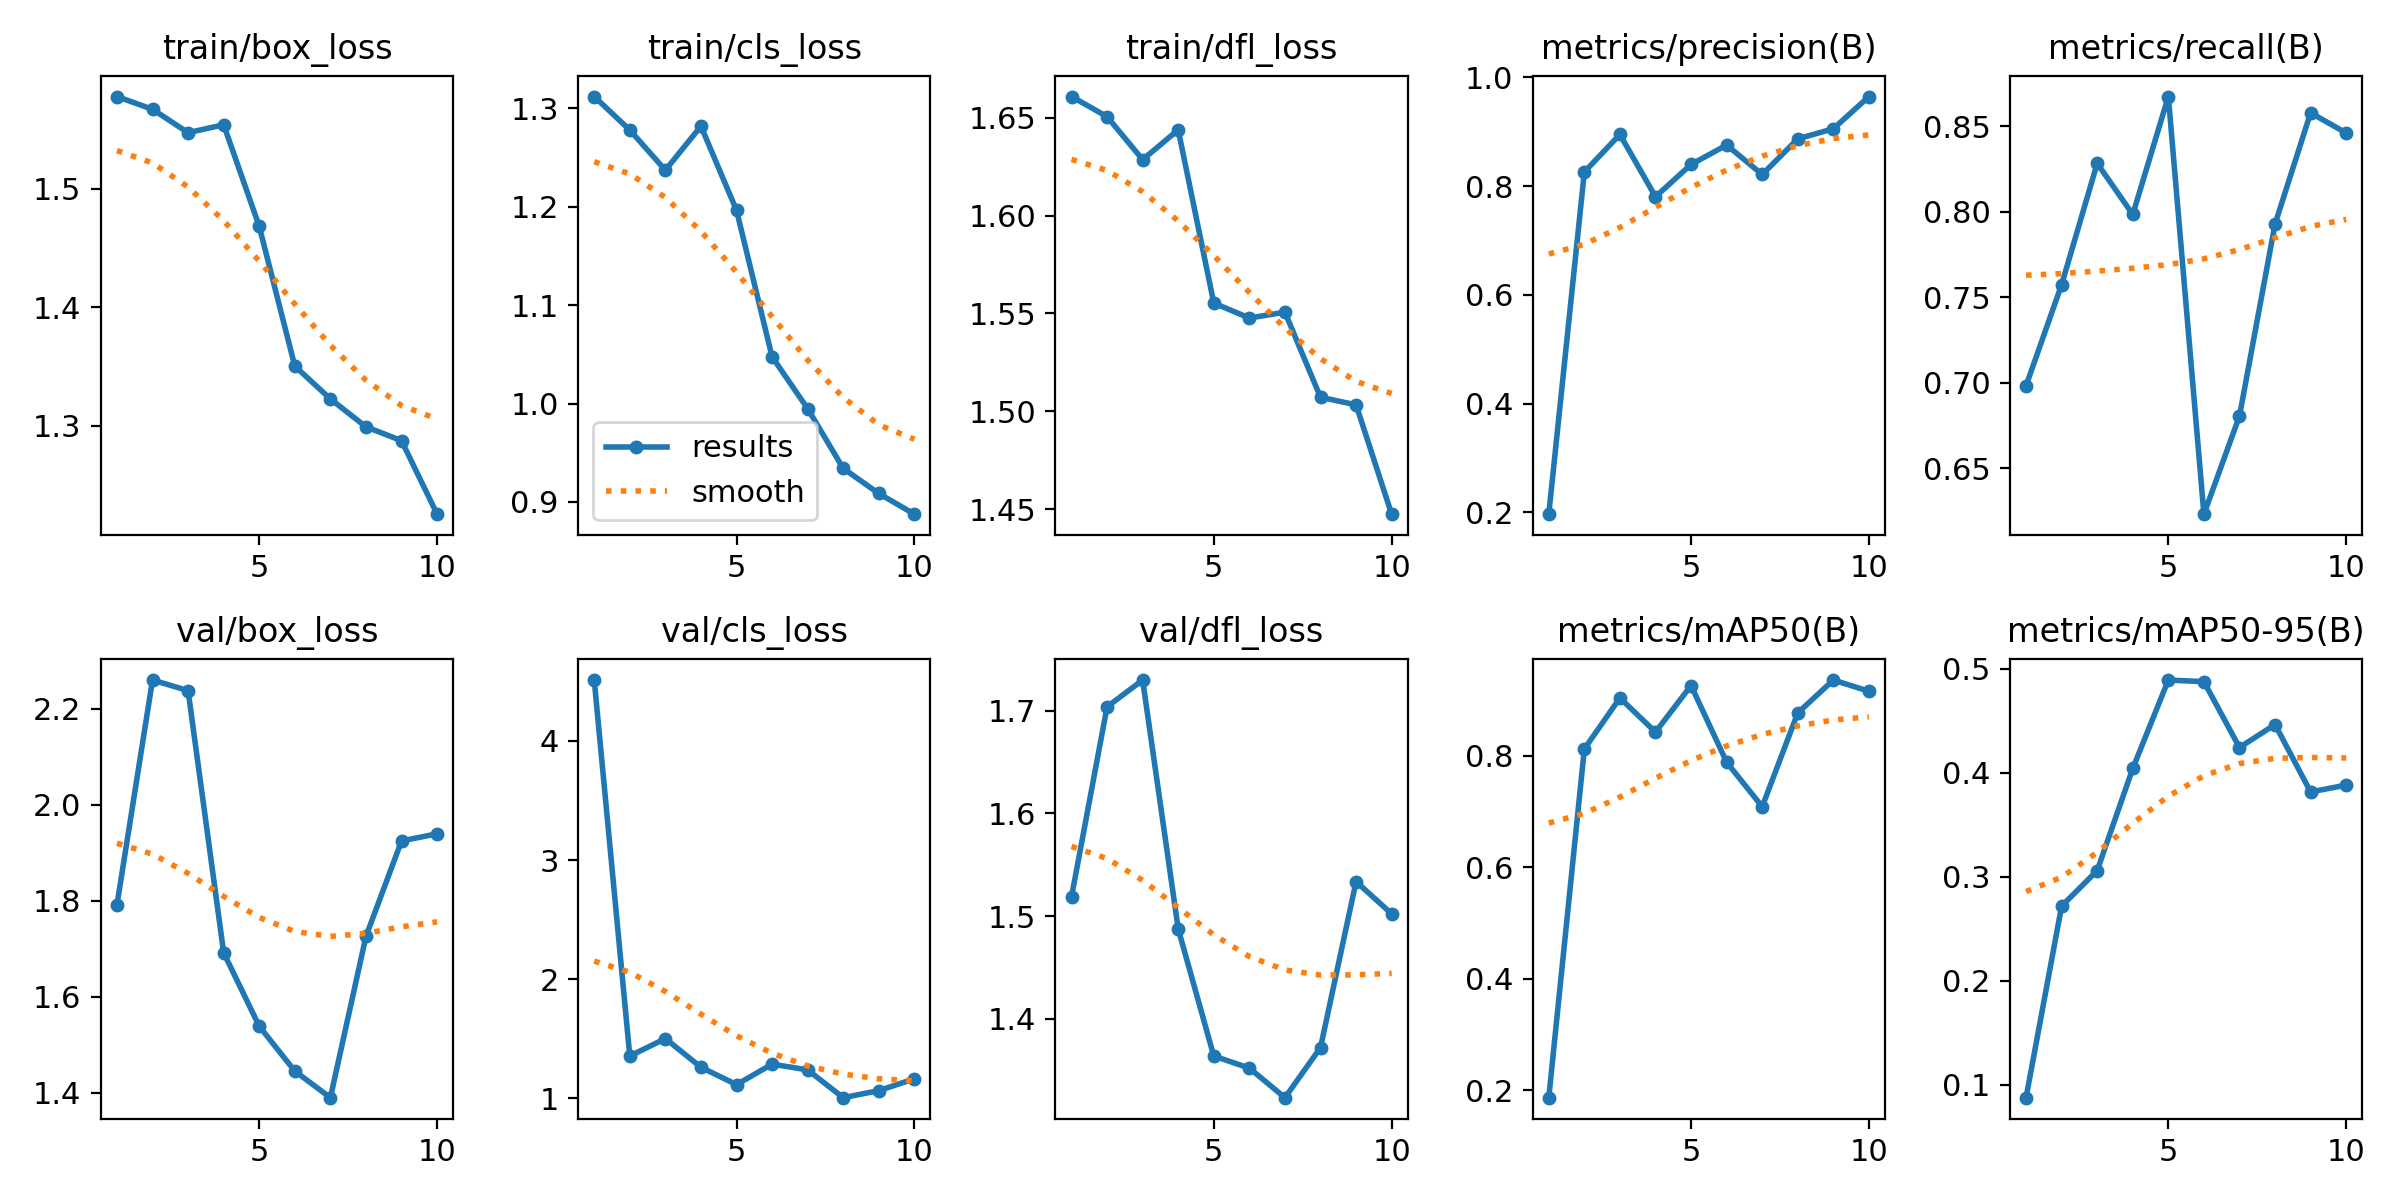

In [3]:
Image.open('./runs/detect/train10/results.png')

When observing the graphs and confusion matrix, it is clear that the model training was decent but, it could have been better. In the graphs below, the orange line represents the ideal path and the blue line represents the training data path. In all graphs, at the beginning of training, the model does quite poorly. But, as training progresses, the model improves and is able to hit right around the ideal mark.